In [1]:
import pandas as pd
import numpy as np
from fetch_data import get_sp_tickers
from portfolio_simulation import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
initial_date = '2014-01-01'
horizon = 4

year_start = initial_date.split('-')[0]
year_end = str(int(year_start) + horizon)
year_insample = str(int(year_end) - 1)

In [3]:
tickers = get_sp_tickers(initial_date)

In [4]:
new_universe = stock_universe(tickers, year_start, year_end, year_insample)

In [5]:
new_universe.create_universe()

Fetching ESG data...
ESG data done.

Fetching stock price data...
- FOXA: Data doesn't exist for startDate = 1388534400, endDate = 1546214400
Stock price data done.

Implementing screening strategies...
Screening done.
Stock universe created. ( ͡° ͜ʖ ͡°)


In [6]:
portfolio_size=25
l_bound=0.002
up_bound=0.1
risk_free_rate=0.02
opt_method='neg_sharpe'
value_a_risk=0.95
runs=300

simulation = Portfolio_Simulation(
    new_universe,
    portfolio_size,
    l_bound,
    up_bound,
    risk_free_rate,
    opt_method,
    value_a_risk,
    runs
)

In [7]:
simulation.simulate()

Simulation completed.

Simulation completed.

Simulation completed.

Simulation completed.

Simulation completed.



<Figure size 720x432 with 0 Axes>

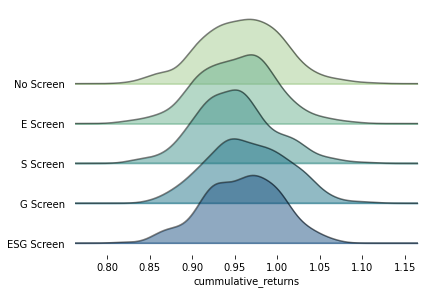

Comparing 'No Screen' strategy with 'E Screen' strategy:
Metric: cummulative_returns
Mann-Whitney U Statistic: 48601.00
p-value: 0.0899
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'S Screen' strategy:
Metric: cummulative_returns
Mann-Whitney U Statistic: 50343.00
p-value: 0.0119
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'G Screen' strategy:
Metric: cummulative_returns
Mann-Whitney U Statistic: 41507.00
p-value: 0.1000
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'ESG Screen' strategy:
Metric: cummulative_returns
Mann-Whitney U Statistic: 44562.00
p-value: 0.8367
Result: The two samples are not significantly different (p >= 0.05).



In [9]:
simulation.create_plot('cummulative_returns', 'oof')
simulation.statistical_test('cummulative_returns', 'oof')

<Figure size 720x432 with 0 Axes>

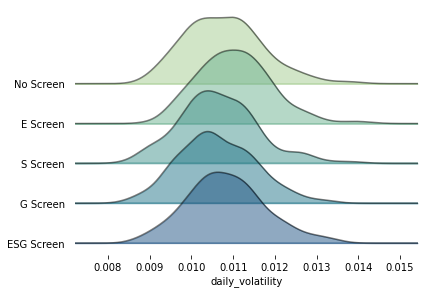

Comparing 'No Screen' strategy with 'E Screen' strategy:
Metric: daily_volatility
Mann-Whitney U Statistic: 37420.00
p-value: 0.0004
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'S Screen' strategy:
Metric: daily_volatility
Mann-Whitney U Statistic: 48484.00
p-value: 0.1008
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'G Screen' strategy:
Metric: daily_volatility
Mann-Whitney U Statistic: 48975.00
p-value: 0.0612
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'ESG Screen' strategy:
Metric: daily_volatility
Mann-Whitney U Statistic: 43218.00
p-value: 0.4014
Result: The two samples are not significantly different (p >= 0.05).



In [10]:
simulation.create_plot('daily_volatility', 'oof')
simulation.statistical_test('daily_volatility', 'oof')

<Figure size 720x432 with 0 Axes>

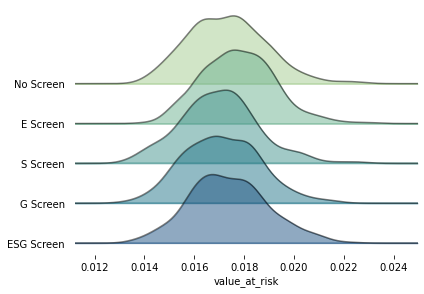

Comparing 'No Screen' strategy with 'E Screen' strategy:
Metric: value_at_risk
Mann-Whitney U Statistic: 37245.00
p-value: 0.0003
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'S Screen' strategy:
Metric: value_at_risk
Mann-Whitney U Statistic: 49897.00
p-value: 0.0211
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'G Screen' strategy:
Metric: value_at_risk
Mann-Whitney U Statistic: 47908.00
p-value: 0.1709
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'ESG Screen' strategy:
Metric: value_at_risk
Mann-Whitney U Statistic: 43807.00
p-value: 0.5743
Result: The two samples are not significantly different (p >= 0.05).



In [11]:
simulation.create_plot('value_at_risk', 'oof')
simulation.statistical_test('value_at_risk', 'oof')

<Figure size 720x432 with 0 Axes>

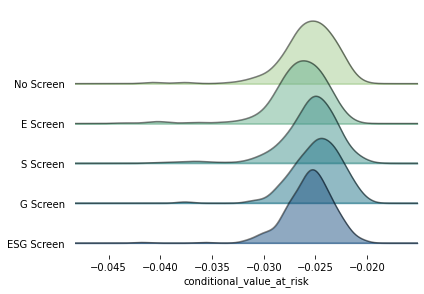

Comparing 'No Screen' strategy with 'E Screen' strategy:
Metric: conditional_value_at_risk
Mann-Whitney U Statistic: 54772.00
p-value: 0.0000
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'S Screen' strategy:
Metric: conditional_value_at_risk
Mann-Whitney U Statistic: 43366.00
p-value: 0.4417
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'G Screen' strategy:
Metric: conditional_value_at_risk
Mann-Whitney U Statistic: 36952.00
p-value: 0.0002
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'ESG Screen' strategy:
Metric: conditional_value_at_risk
Mann-Whitney U Statistic: 45505.00
p-value: 0.8122
Result: The two samples are not significantly different (p >= 0.05).



In [12]:
simulation.create_plot('conditional_value_at_risk', 'oof')
simulation.statistical_test('conditional_value_at_risk', 'oof')

<Figure size 720x432 with 0 Axes>

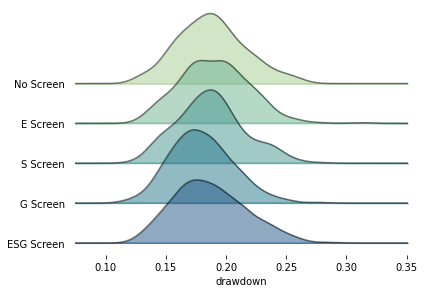

Comparing 'No Screen' strategy with 'E Screen' strategy:
Metric: drawdown
Mann-Whitney U Statistic: 42848.00
p-value: 0.3109
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'S Screen' strategy:
Metric: drawdown
Mann-Whitney U Statistic: 45804.00
p-value: 0.7051
Result: The two samples are not significantly different (p >= 0.05).

Comparing 'No Screen' strategy with 'G Screen' strategy:
Metric: drawdown
Mann-Whitney U Statistic: 52560.00
p-value: 0.0004
Result: The two samples are significantly different (p < 0.05).

Comparing 'No Screen' strategy with 'ESG Screen' strategy:
Metric: drawdown
Mann-Whitney U Statistic: 46790.00
p-value: 0.3993
Result: The two samples are not significantly different (p >= 0.05).



In [13]:
simulation.create_plot('drawdown', 'oof')
simulation.statistical_test('drawdown', 'oof')